# Project: Solving Company HR Issues

## Preparation

### Preparing the Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

### Preparing the Data to Be Used

In [ ]:
url = "https://drive.google.com/uc?id=1FbuIekQNPUkn7cWaZ_ZKV9mQnNd4PRFr"
hr_df = pd.read_csv(url)

## Data Understanding

In [ ]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

No data needs to be transformed, and only one column contains null values when looking at the entire dataset, which is Attrition.

In [ ]:
hr_df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
hr_df.isnull().sum()


,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


It can be seen that only one column has null values. What I did was drop those rows because it is still reasonable to do so, as the dataset remains sufficiently large.

In [ ]:
hr_df.duplicated().sum()

np.int64(0)

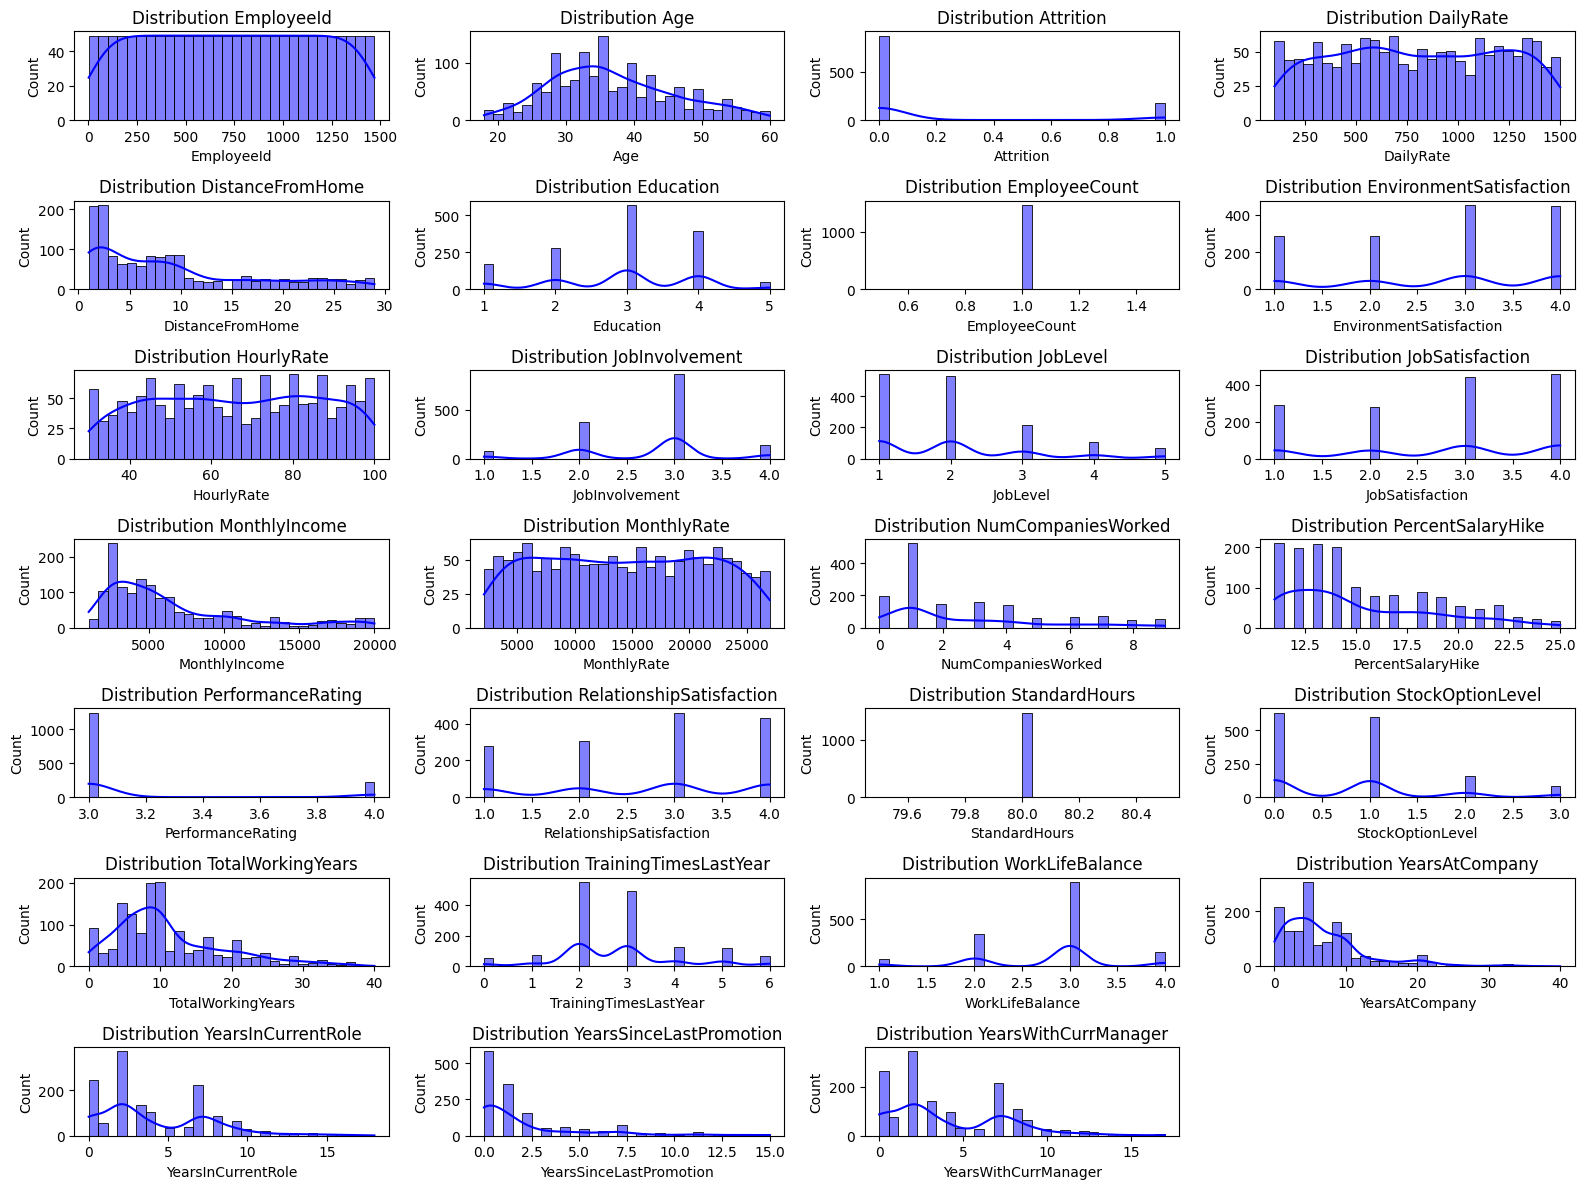

In [ ]:
num_features = hr_df.select_dtypes(include=[np.number])
n_cols = 4
n_rows = (len(num_features.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(16, 12))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(hr_df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribution {column}')
plt.tight_layout()
plt.show()


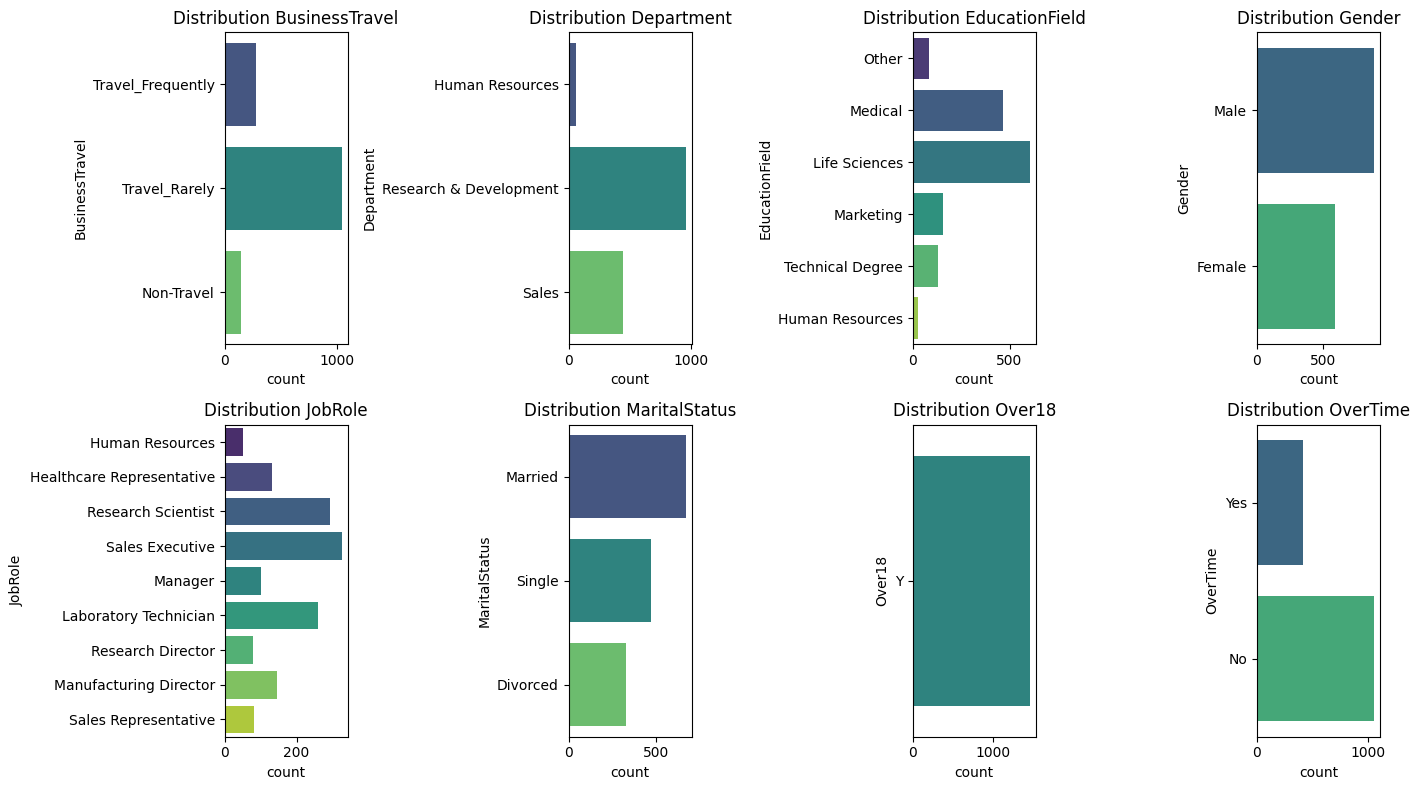

In [ ]:
# Categorical Features Distribution
cat_features = hr_df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=hr_df[column], palette='viridis')
    plt.title(f'Distribution {column}')
plt.tight_layout()
plt.show()

Employee ID, Standard Hours, Employee Count, and Over18 do not provide meaningful information, so they can be removed.

## Data Preparation / Preprocessing

In [ ]:
hr_df.dropna(inplace=True)

Tenure Ratio: How much of an employee’s life is spent at the company.

In [ ]:
hr_df["TenureRatio"] = hr_df["YearsAtCompany"] / hr_df["Age"]


Promotion Gap: Apakah dia stagnan promosi.

In [ ]:
hr_df["PromotionGap"] = hr_df["YearsSinceLastPromotion"] / (hr_df["YearsAtCompany"]+1)

Income per Level: Salary relative to the position.

In [ ]:
hr_df["IncomePerLevel"] = hr_df["MonthlyIncome"] / (hr_df["JobLevel"]+1)

Salary Growth Rate: Measures whether salary increases are consistent.

In [ ]:
hr_df["SalaryGrowth"] = hr_df["PercentSalaryHike"] / (hr_df["YearsAtCompany"]+1)


Balance Engagement: Measures whether an employee is overly engaged without balance.

In [ ]:
hr_df["BalanceEngagement"] = hr_df["WorkLifeBalance"] * hr_df["JobInvolvement"]


Manager Dependency: Measures whether an employee is willing to work for only one manager.

In [ ]:
hr_df["ManagerDependency"] = hr_df["YearsWithCurrManager"] / (hr_df["YearsAtCompany"]+1)

In [ ]:
hr_df.to_csv("hr_df.csv", index=False)

In [ ]:
# Remove Unnecessary Columns
hr_df = hr_df.drop(columns=['EmployeeId', 'Over18', 'StandardHours', 'EmployeeCount'])

In [ ]:
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TenureRatio',
       'PromotionGap', 'IncomePerLevel', 'SalaryGrowth', 'BalanceEngagement',
       'ManagerDependency'],
      dtype='object')

In [ ]:
cat_features = hr_df.select_dtypes(include=[object])
cat_features.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

##EDA

In [ ]:
numerical_columns = hr_df.select_dtypes(include=[np.number]).columns

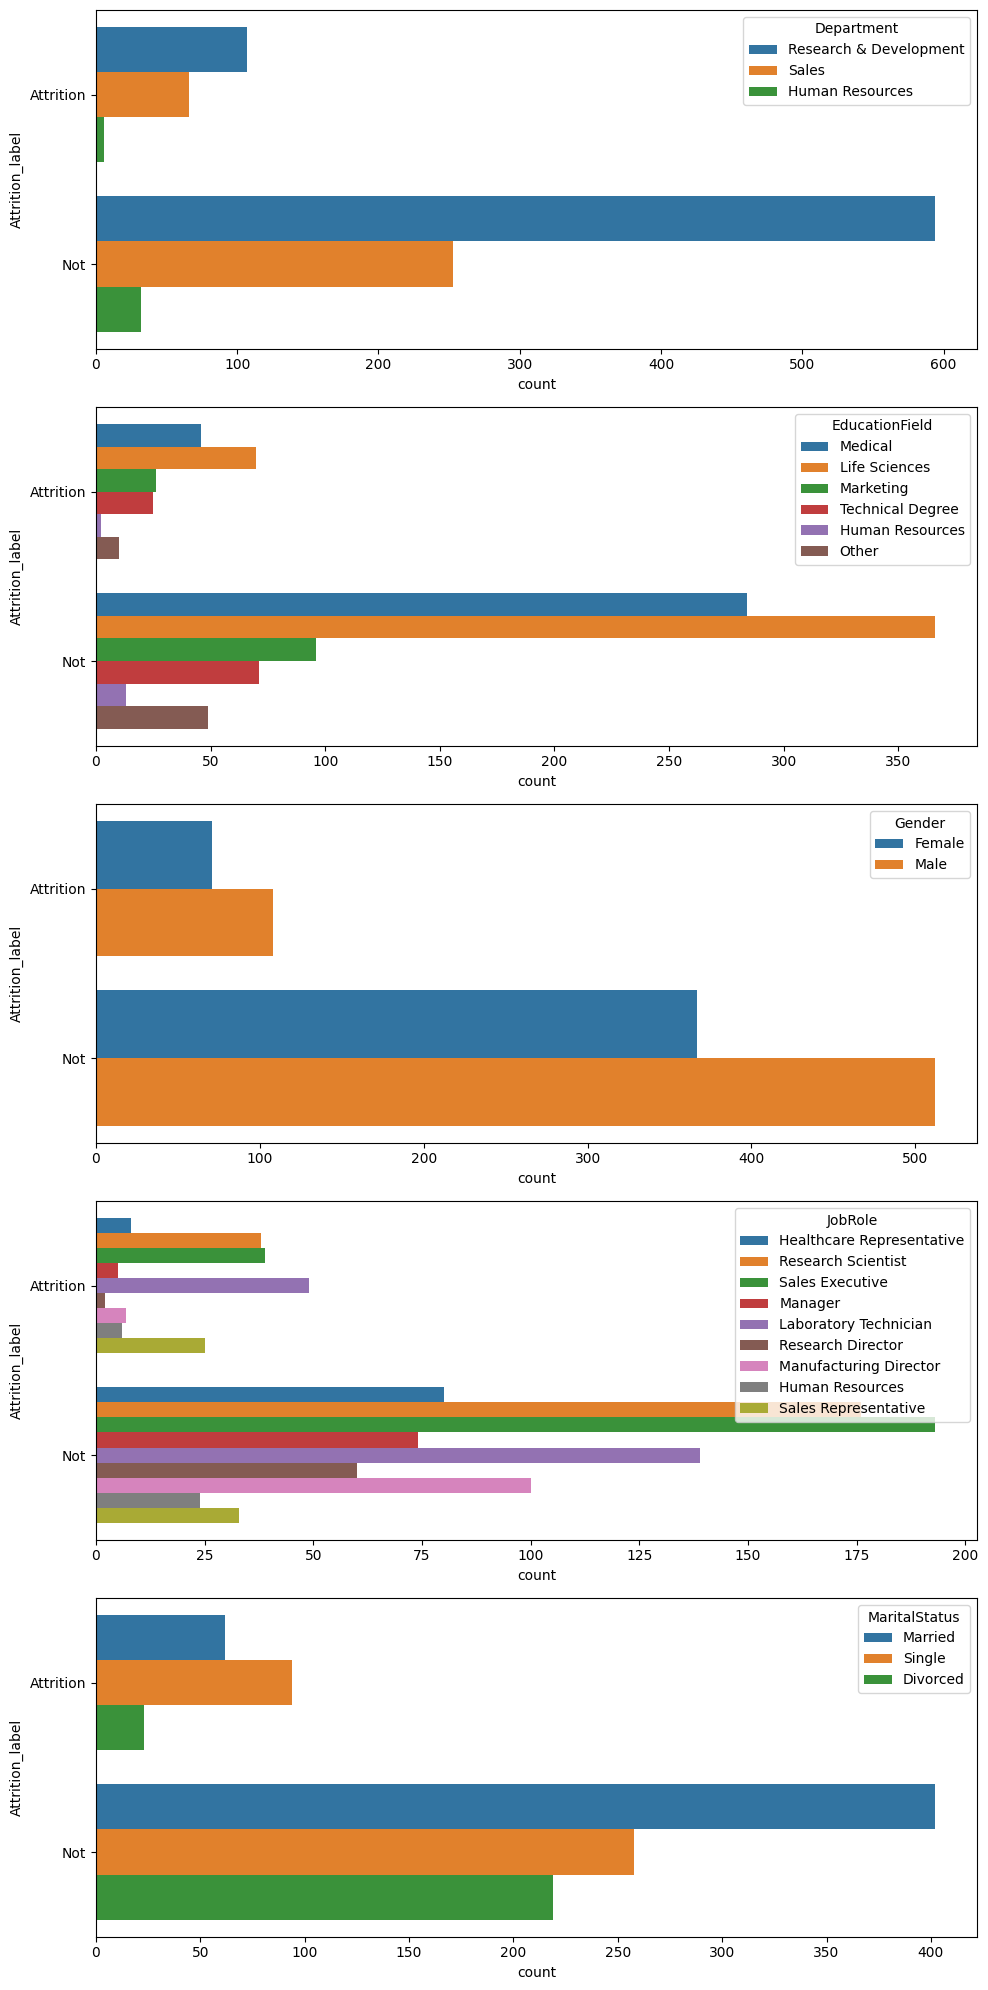

In [ ]:
hr_df['Attrition_label'] = hr_df['Attrition'].map({0: 'Not', 1: 'Attrition'})
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,20))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, y=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

categorical_plot(
    features=[
        'Department',
        'EducationField',
        'Gender',
        'JobRole',
        'MaritalStatus',
    ],
    df=hr_df,
    segment_feature="Attrition_label"
)

Categorical Variable Analysis

a. Department

Research & Development shows the highest attrition count but also dominates the non-attrition group, indicating it's the largest department overall.

Sales has moderate attrition levels, while Human Resources shows minimal attrition, likely due to smaller department size.

b. Education Field

Life Sciences shows the highest representation in both attrition and non-attrition groups, suggesting it's the most common educational background.

Medical and Marketing fields show moderate attrition patterns, while Technical Degree, Human Resources, and Other fields have relatively lower counts across both categories.

c. Gender

Male employees show higher attrition counts compared to females, and also dominate the non-attrition group.

This suggests males represent a larger proportion of the workforce overall, with proportional attrition rates.

d. Job Role

Laboratory Technician and Sales Executive show notable attrition levels.

Research Scientist, Sales Representative, and Manager roles appear frequently in the non-attrition group, indicating better retention in these positions.

Manufacturing Director and Research Director show minimal attrition, possibly due to seniority or smaller role populations.

e. Marital Status

Single employees show higher attrition rates compared to married employees.

Married employees dominate the non-attrition category, suggesting marital status may correlate with job stability.

Divorced employees show the lowest counts in both categories.

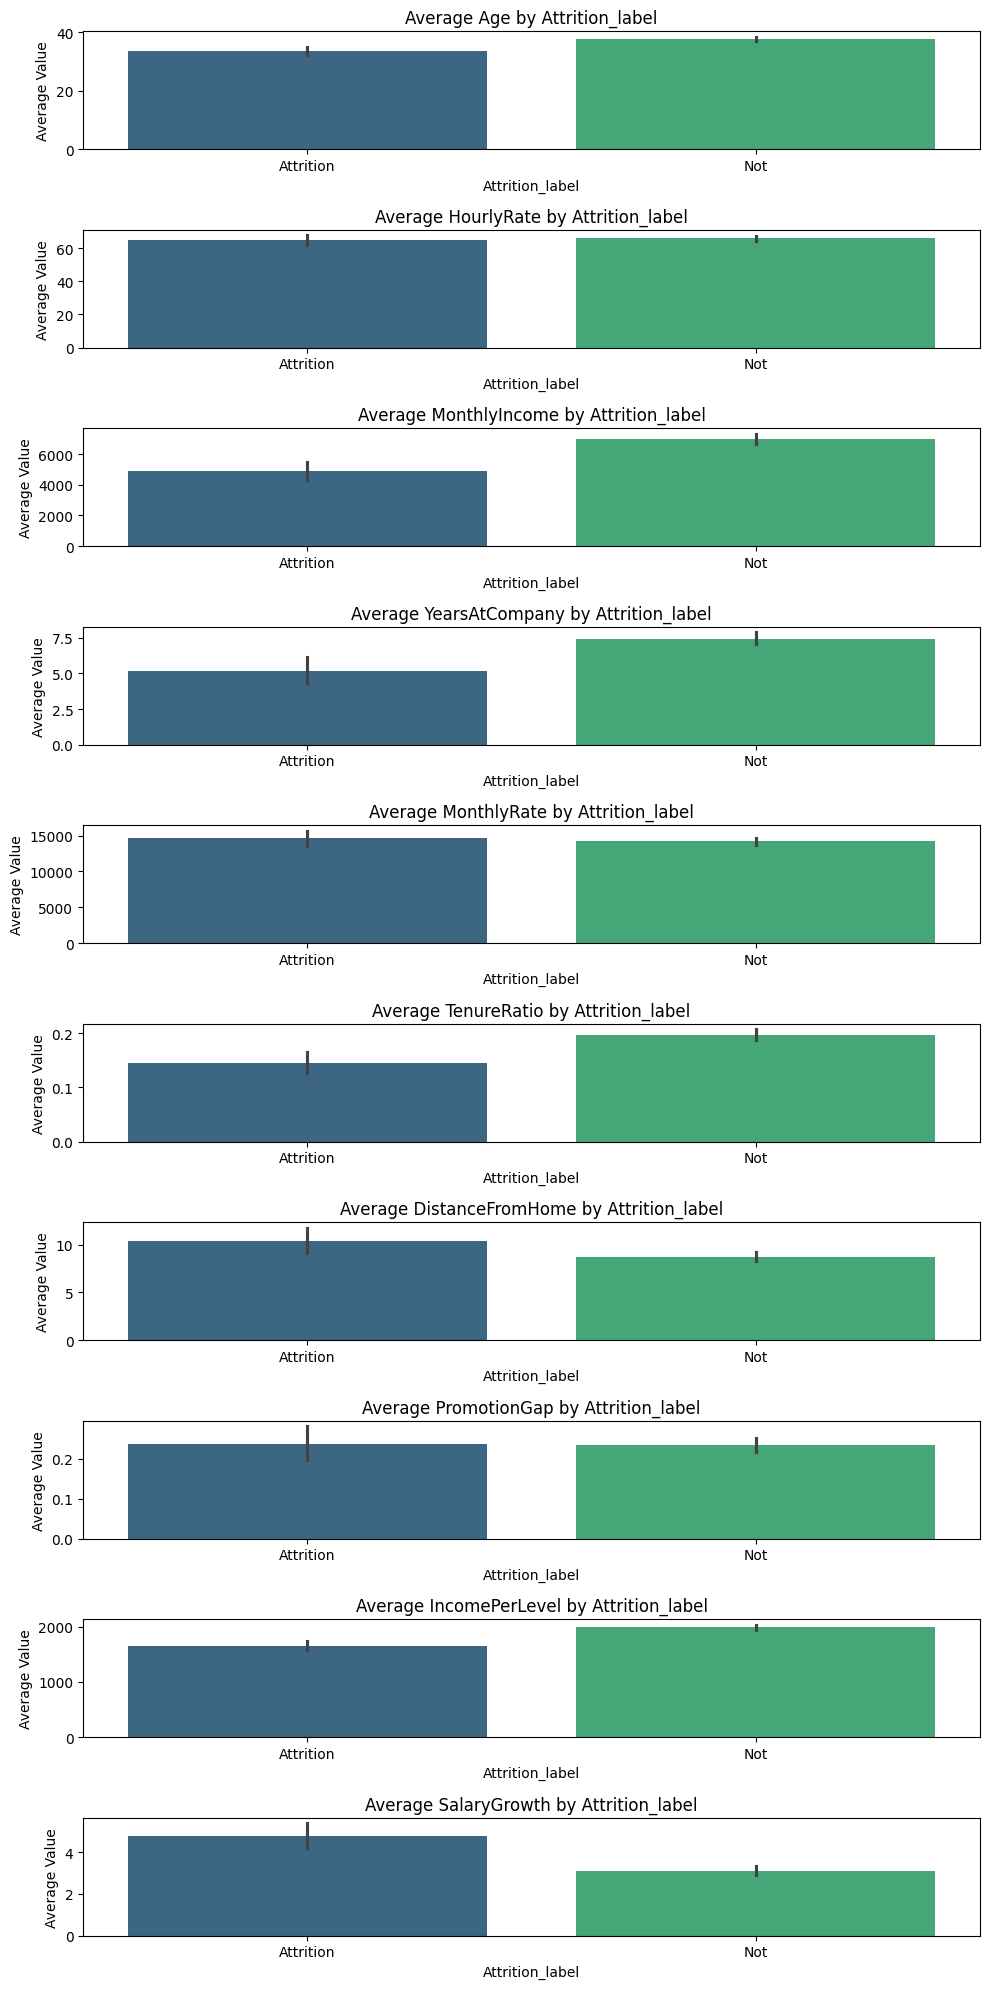

In [ ]:
def average_plot(features, df, segment_feature):
    fig, ax = plt.subplots(len(features), 1, figsize=(10, 20))

    for i, feature in enumerate(features):
        sns.barplot(
            data=df,
            x=segment_feature,
            y=feature,
            estimator=np.mean,
            errorbar=('ci', 95),
            ax=ax[i],
            palette="viridis"
        )
        ax[i].set_title(f'Average {feature} by {segment_feature}')
        ax[i].set_ylabel('Average Value')
        ax[i].set_xlabel(segment_feature)

    plt.tight_layout()
    plt.show()

average_plot(
    features=[
        'Age',
        'HourlyRate',
        'MonthlyIncome',
        'YearsAtCompany',
        'MonthlyRate',
        'TenureRatio',
        'DistanceFromHome',
        'PromotionGap',
        'IncomePerLevel',
        'SalaryGrowth'
    ],
    df=hr_df,
    segment_feature="Attrition_label"
)


Numerical Variable Analysis

a. Age

Employees who left (Attrition) have an average age of approximately 34 years, while those who stayed (Not) average around 37 years.

This suggests younger employees are more likely to leave the company, possibly seeking career growth or exploring opportunities.

b. Hourly Rate

Both groups show similar average hourly rates (around 65), indicating hourly compensation is not a significant differentiator in attrition.

c. Monthly Income

Employees who stayed earn significantly higher monthly income (approximately 6,500) compared to those who left (around 4,800).

This indicates that lower income is strongly associated with higher attrition risk.

d. Years at Company

Employees who left average about 5 years with the company, while those who stayed average around 7 years.

Shorter tenure correlates with higher attrition, suggesting retention improves with time.

e. Monthly Rate

Similar to hourly rate, both groups show comparable monthly rates (around 14,000), suggesting this metric has minimal impact on attrition.

f. Tenure Ratio

Employees who stayed show a higher tenure ratio (approximately 0.20) compared to those who left (around 0.15).

This reinforces that longer-tenured employees are more stable.

g. Distance From Home

Employees who left live slightly farther from the workplace (around 10 units) compared to those who stayed (around 9 units).

Longer commutes may contribute to attrition decisions.

h. Promotion Gap

Both groups show similar promotion gap values (around 0.25), indicating time since last promotion has minimal direct correlation with attrition.

i. Income Per Level

Employees who stayed have higher income per level (approximately 1,900) compared to those who left (around 1,600).

This suggests employees who feel fairly compensated for their level are more likely to stay.

j. Salary Growth

Employees who left show higher average salary growth (around 5) compared to those who stayed (around 3).

Paradoxically, this may indicate that recent raises were insufficient to retain high-performing employees seeking better opportunities.

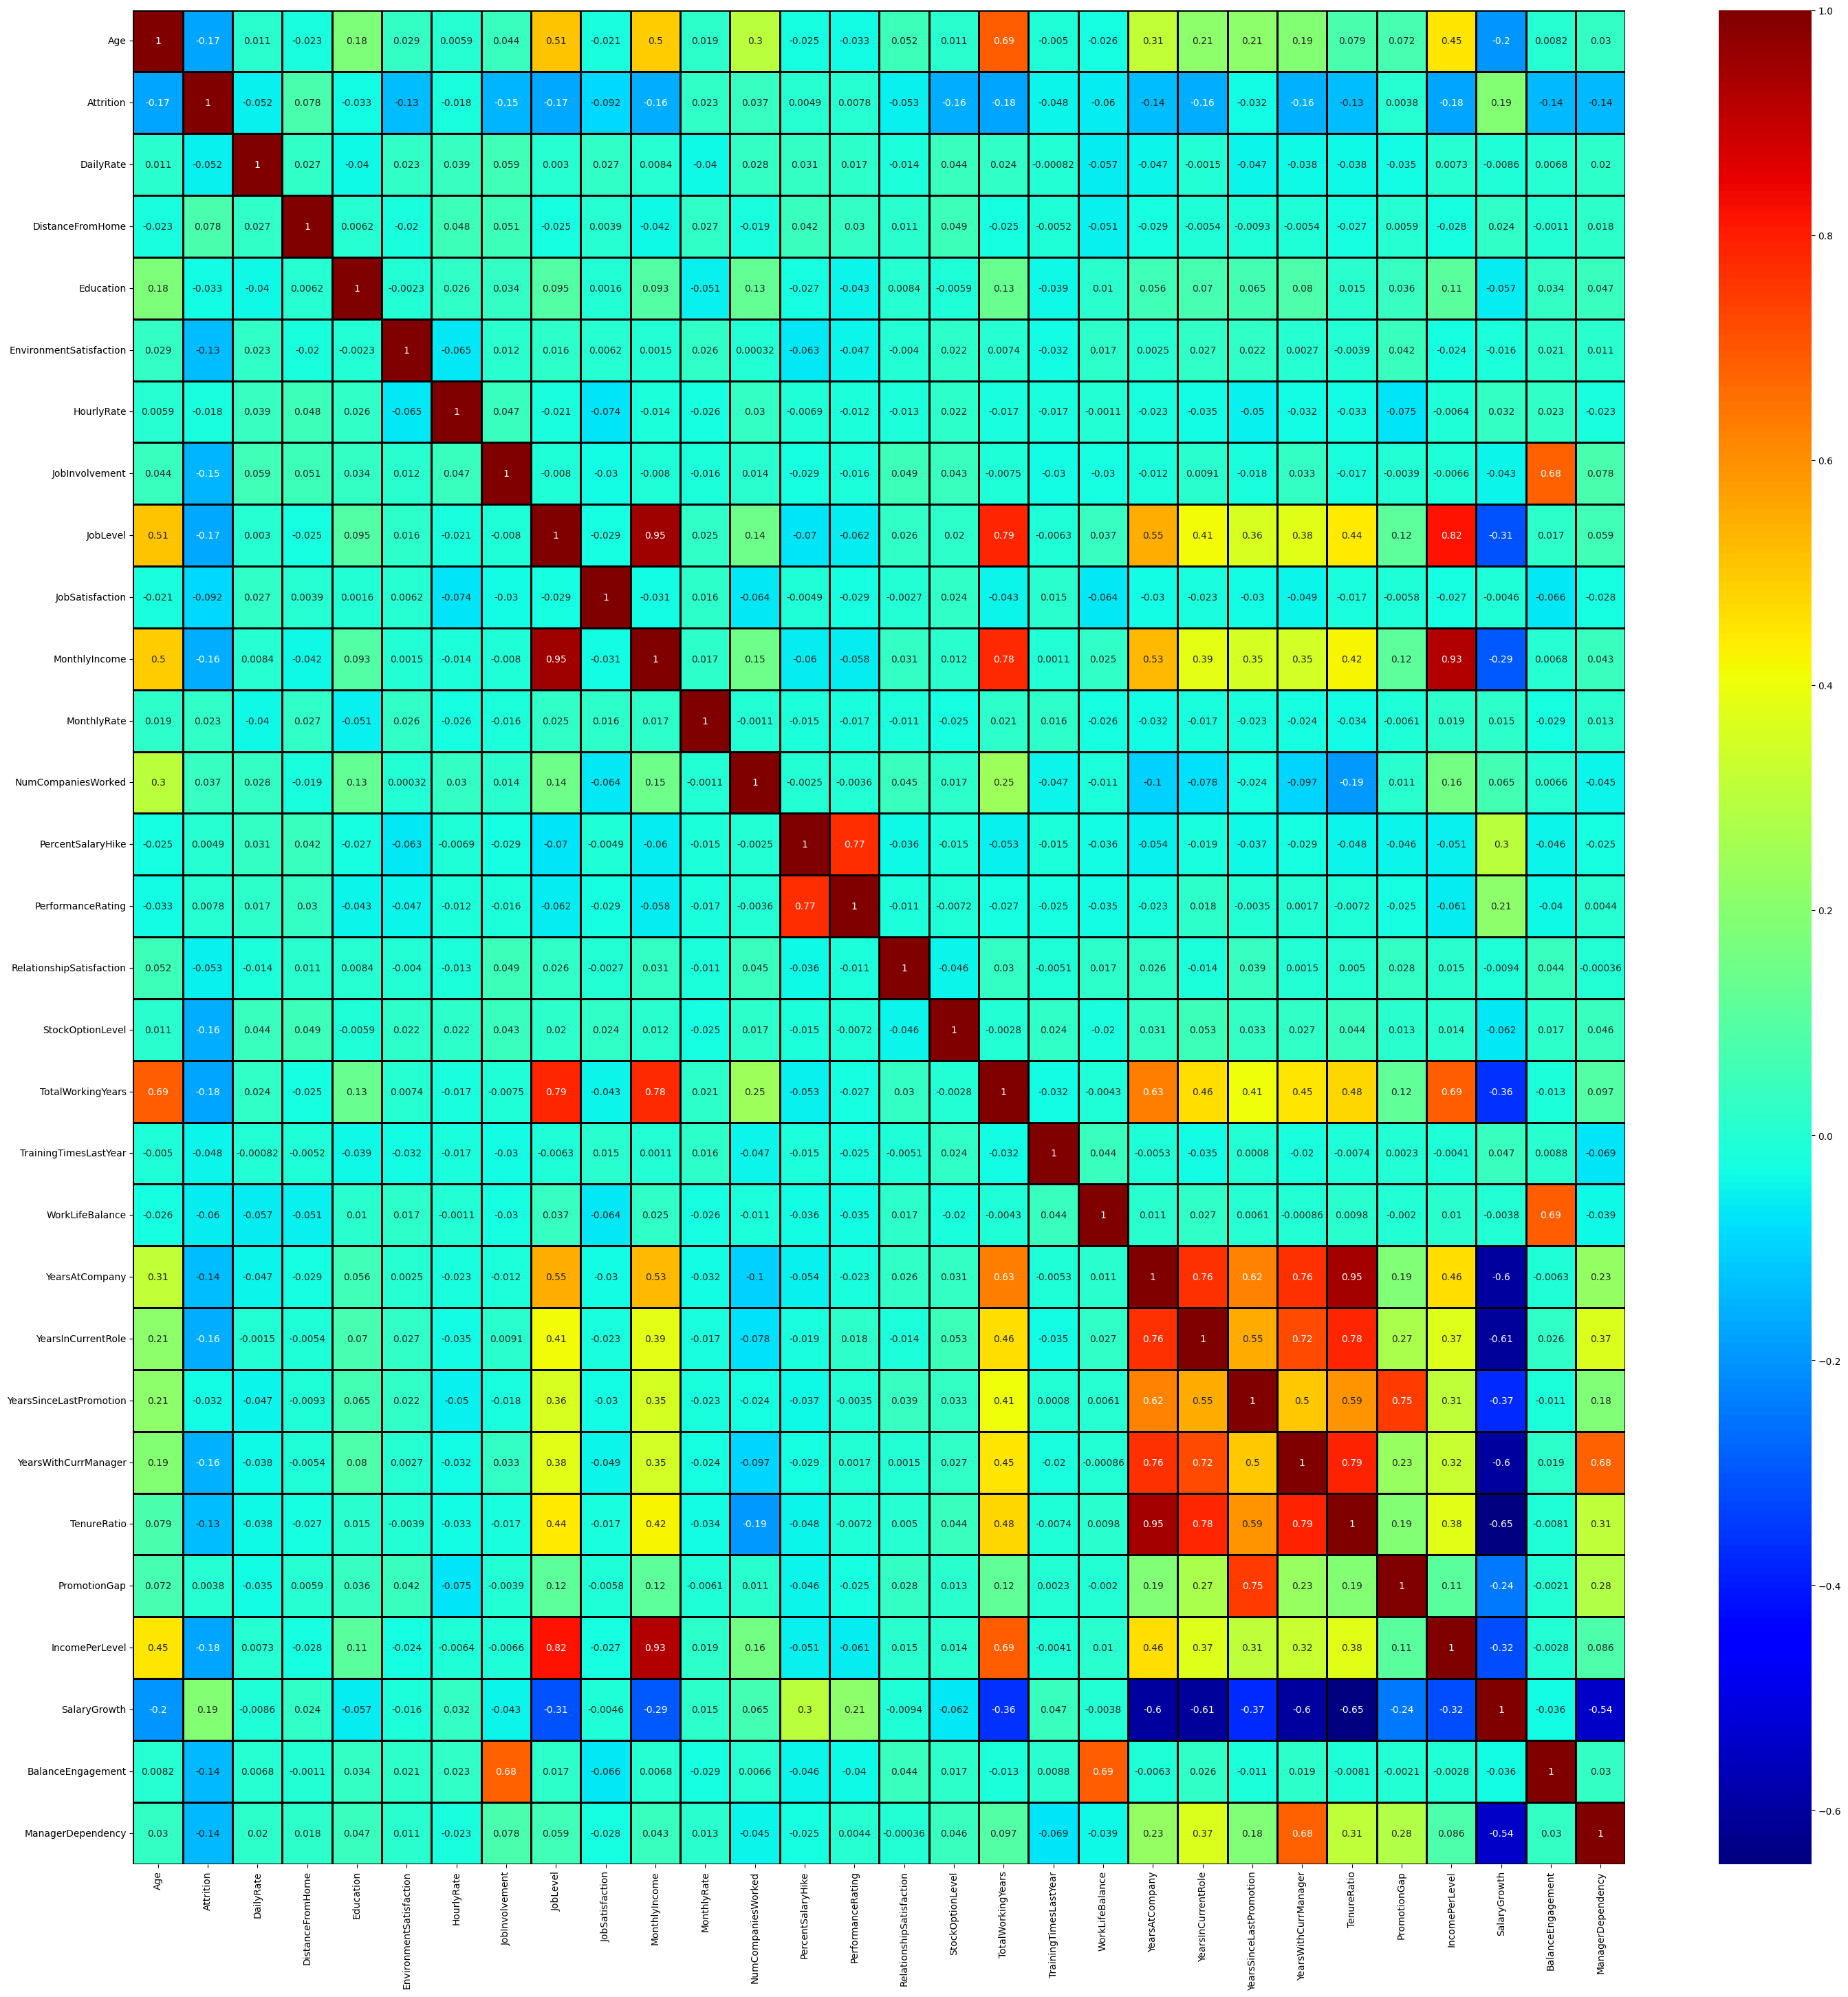

In [ ]:
plt.figure(figsize=(35,35))
sns.heatmap(hr_df[numerical_columns].corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

From the data visualization above, several features show positive and negative correlations with each other, indicating the presence of multicollinearity in the dataset. This issue will be addressed during the feature selection stage using forward selection.

In [ ]:
hr_df.drop(columns=["Attrition_label"], inplace=True)

## Modeling

###Split Test & Training

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
train_df, test_df = train_test_split(
    hr_df,
    test_size=0.20,
    random_state=42,
    stratify=hr_df["Attrition"]
)

X_train = train_df.drop("Attrition", axis=1)
y_train = train_df["Attrition"]

X_test = test_df.drop("Attrition", axis=1)
y_test = test_df["Attrition"]

###Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

X_train_enc = X_train.copy()
X_test_enc  = X_test.copy()

X_train_enc[categorical_columns] = encoder.fit_transform(X_train[categorical_columns])
X_test_enc[categorical_columns]  = encoder.transform(X_test[categorical_columns])

###Feature Importances

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import f1_score, recall_score, precision_score

feature_counts = [8, 10, 12, 15]
results = []

for n in feature_counts:
    rf_fast = RandomForestClassifier(
        n_estimators=20,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    )

    sfs = SequentialFeatureSelector(
        rf_fast,
        n_features_to_select=n,
        direction="forward",
        scoring="f1",
        cv=3,
        n_jobs=-1
    )

    sfs.fit(X_train_enc, y_train)
    selected_features = X_train_enc.columns[sfs.get_support()].tolist()

    results.append({
        "Fitur": n,
        "Features": selected_features
    })

df_features = pd.DataFrame(results)
recommended_features = df_features.iloc[-1]["Features"]

In [ ]:
count = 0
for i in recommended_features:
  count += 1

print(count)
print(recommended_features)

15
['Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'PromotionGap', 'BalanceEngagement', 'ManagerDependency']


The optimal number of features identified is **15**, which includes a balanced mix of demographic, job-related, compensation, satisfaction, performance, and engineered features such as Gender, JobLevel, MonthlyIncome, OverTime, JobSatisfaction, WorkLifeBalance, YearsAtCompany, PromotionGap, BalanceEngagement, and ManagerDependency. This selection provides the best trade-off between model complexity and predictive performance for attrition prediction.

###Scaling

In [ ]:
from sklearn.preprocessing import  MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

X_train_sel = X_train_enc[recommended_features]
X_test_sel  = X_test_enc[recommended_features]

X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled  = scaler.transform(X_test_sel)

###Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(
    X_train_scaled,
    y_train
)

X_train_res = shuffle(X_train_res, random_state=42)
y_train_res = shuffle(y_train_res, random_state=42)

##Algorithm

In [ ]:
import pandas as pd

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="binary", zero_division=0),
        "Recall": recall_score(y_test, y_pred, average="binary", zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, average="binary", zero_division=0),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }


models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42
    ),
    "Naive Bayes": GaussianNB()
}


results_list = []

for name, model in models.items():
    model.fit(X_train_res, y_train_res)

    metrics = evaluate_model(
        model,
        X_test_scaled,
        y_test,
        name
    )

    results_list.append({
        "Model": metrics["Model"],
        "Accuracy": metrics["Accuracy"],
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1-Score": metrics["F1-Score"],
        "Confusion Matrix": metrics["Confusion Matrix"]
    })


summary_df = pd.DataFrame(results_list)

print("\nSummary of the model:")
print(summary_df.sort_values(by="F1-Score", ascending=False))


Summary of the model:
                 Model  Accuracy  Precision    Recall  F1-Score  \
5              XGBoost  0.849057   0.571429  0.444444  0.500000   
3  Logistic Regression  0.688679   0.317073  0.722222  0.440678   
4                  SVM  0.712264   0.328767  0.666667  0.440367   
0                  KNN  0.669811   0.282051  0.611111  0.385965   
2        Random Forest  0.830189   0.500000  0.305556  0.379310   
6          Naive Bayes  0.575472   0.250000  0.750000  0.375000   
1        Decision Tree  0.754717   0.289474  0.305556  0.297297   

        Confusion Matrix  
5  [[164, 12], [20, 16]]  
3  [[120, 56], [10, 26]]  
4  [[127, 49], [12, 24]]  
0  [[120, 56], [14, 22]]  
2  [[165, 11], [25, 11]]  
6    [[95, 81], [9, 27]]  
1  [[149, 27], [25, 11]]  


###Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000
)

param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"],
    "class_weight": [None, "balanced"]
}

CV_lr = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid,
    cv=5,
    scoring="recall",
    n_jobs=-1,
    verbose=1
)

# TRAIN on SMOTE DATA
CV_lr.fit(X_train_res, y_train_res)

best_lr_model = CV_lr.best_estimator_

print("Best Parameters:")
print(CV_lr.best_params_)

y_proba = best_lr_model.predict_proba(X_test_scaled)[:, 1]

threshold = 0.5
y_pred = (y_proba >= threshold).astype(int)

print("\nClassification Report (Threshold = 0.5):")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(cm)
print(f"\n  True Negatives  (TN): {cm[0,0]:4d}")
print(f"  False Positives (FP): {cm[0,1]:4d}")
print(f"  False Negatives (FN): {cm[1,0]:4d}")
print(f"  True Positives  (TP): {cm[1,1]:4d}")


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)


print("\nSUMMARY METRICS (Threshold = 0.5)")
print(f"Accuracy : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters:
{'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report (Threshold = 0.5):
              precision    recall  f1-score   support

         0.0       0.92      0.69      0.79       176
         1.0       0.32      0.69      0.43        36

    accuracy                           0.69       212
   macro avg       0.62      0.69      0.61       212
weighted avg       0.82      0.69      0.73       212


Confusion Matrix:
[[122  54]
 [ 11  25]]

  True Negatives  (TN):  122
  False Positives (FP):   54
  False Negatives (FN):   11
  True Positives  (TP):   25

SUMMARY METRICS (Threshold = 0.5)
Accuracy : 0.6934 (69.34%)
Precision: 0.3165
Recall   : 0.6944
F1-Score : 0.4348
ROC AUC  : 0.7532


###Random Forest

In [ ]:
rf_model = RandomForestClassifier(
    random_state=123,
    n_jobs=-1
)

param_grid_fast = {
    "n_estimators": [200, 300],
    "max_depth": [6, 8, None],
    "max_features": ["sqrt"],
    "criterion": ["gini"]
}

CV_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_fast,
    cv=3,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

# TRAIN on SMOTE DATA
CV_rf.fit(X_train_res, y_train_res)
best_rf_model = CV_rf.best_estimator_

print("Best Parameters:", CV_rf.best_params_)
print("Best CV F1 Score:", CV_rf.best_score_)

y_pred = best_rf_model.predict(X_test_scaled)
y_pred_proba = best_rf_model.predict_proba(X_test_scaled)[:, 1]

cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(cm)
print(f"\n  True Negatives  (TN): {cm[0,0]}")
print(f"  False Positives (FP): {cm[0,1]}")
print(f"  False Negatives (FN): {cm[1,0]}")
print(f"  True Positives  (TP): {cm[1,1]}")

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall    = recall_score(y_test, y_pred, zero_division=0)
f1        = f1_score(y_test, y_pred, zero_division=0)
roc_auc  = roc_auc_score(y_test, y_pred_proba)

print("\n" + "="*80)
print("SUMMARY METRICS (RANDOM FOREST)")
print("="*80)
print(f"Accuracy : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Best CV F1 Score: 0.9165467139970042

Confusion Matrix:
[[163  13]
 [ 23  13]]

  True Negatives  (TN): 163
  False Positives (FP): 13
  False Negatives (FN): 23
  True Positives  (TP): 13

SUMMARY METRICS (RANDOM FOREST)
Accuracy : 0.8302 (83.02%)
Precision: 0.5000
Recall   : 0.3611
F1-Score : 0.4194
ROC AUC  : 0.7585


###XGBoost

In [ ]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

xgb_model = XGBClassifier(
    random_state=123,
    objective="binary:logistic",
    eval_metric="logloss"
)

param_dist = {
    "n_estimators": randint(100, 300),
    "max_depth": randint(3, 7),
    "learning_rate": uniform(0.05, 0.2),
    "subsample": uniform(0.8, 0.2),
    "colsample_bytree": uniform(0.8, 0.2)
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring="f1",
    cv=3,
    n_jobs=-1,
    random_state=123,
    verbose=1
)

# TRAIN on SMOTE DATA
random_search.fit(X_train_res, y_train_res)

best_xgb_model = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)
print("Best CV F1 Score:", random_search.best_score_)

y_pred_proba = best_xgb_model.predict_proba(X_test_scaled)[:, 1]

# Threshold adjustment
threshold = 0.2
y_pred = (y_pred_proba >= threshold).astype(int)

print(f"\nClassification Report (Threshold = {threshold}):")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"\n  True Negatives  (TN): {cm[0,0]}")
print(f"  False Positives (FP): {cm[0,1]}")
print(f"  False Negatives (FN): {cm[1,0]}")
print(f"  True Positives  (TP): {cm[1,1]}")

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall    = recall_score(y_test, y_pred, zero_division=0)
f1        = f1_score(y_test, y_pred, zero_division=0)
roc_auc  = roc_auc_score(y_test, y_pred_proba)

print("\n" + "="*80)
print("SUMMARY METRICS (XGBOOST)")
print("="*80)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'colsample_bytree': np.float64(0.9249807004191201), 'learning_rate': np.float64(0.184937810197565), 'max_depth': 5, 'n_estimators': 109, 'subsample': np.float64(0.8166389976664878)}
Best CV F1 Score: 0.9127566923045903

Classification Report (Threshold = 0.2):
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85       176
         1.0       0.38      0.58      0.46        36

    accuracy                           0.76       212
   macro avg       0.64      0.69      0.65       212
weighted avg       0.81      0.76      0.78       212


Confusion Matrix:
[[141  35]
 [ 15  21]]

  True Negatives  (TN): 141
  False Positives (FP): 35
  False Negatives (FN): 15
  True Positives  (TP): 21

SUMMARY METRICS (XGBOOST)
Accuracy : 0.7642
Precision: 0.3750
Recall   : 0.5833
F1-Score : 0.4565
ROC-AUC  : 0.7808


###SVM

In [ ]:
svm_model = SVC(
    probability=True,
    random_state=42
)

param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["rbf", "linear"],
    "gamma": ["scale", "auto"]
}

CV_svm = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    cv=3,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

# TRAIN on SMOTE DATA
CV_svm.fit(X_train_res, y_train_res)

best_svm_model = CV_svm.best_estimator_

print("Best Parameters:")
print(CV_svm.best_params_)
print("Best CV F1 Score:", CV_svm.best_score_)

y_proba = best_svm_model.predict_proba(X_test_scaled)[:, 1]

# Threshold
threshold = 0.5
y_pred = (y_proba >= threshold).astype(int)

print(f"\nClassification Report (Threshold = {threshold}):")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"\n  True Negatives  (TN): {cm[0,0]}")
print(f"  False Positives (FP): {cm[0,1]}")
print(f"  False Negatives (FN): {cm[1,0]}")
print(f"  True Positives  (TP): {cm[1,1]}")

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall    = recall_score(y_test, y_pred, zero_division=0)
f1        = f1_score(y_test, y_pred, zero_division=0)
roc_auc  = roc_auc_score(y_test, y_proba)

print("\n" + "="*80)
print("SUMMARY METRICS (SVM)")
print("="*80)
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters:
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV F1 Score: 0.886593656171477

Classification Report (Threshold = 0.5):
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84       176
         1.0       0.34      0.50      0.40        36

    accuracy                           0.75       212
   macro avg       0.61      0.65      0.62       212
weighted avg       0.79      0.75      0.77       212


Confusion Matrix:
[[141  35]
 [ 18  18]]

  True Negatives  (TN): 141
  False Positives (FP): 35
  False Negatives (FN): 18
  True Positives  (TP): 18

SUMMARY METRICS (SVM)
Accuracy : 0.7500
Precision: 0.3396
Recall   : 0.5000
F1-Score : 0.4045
ROC-AUC  : 0.7260


Final Model Selection: XGBoost

Based on the comprehensive evaluation results, XGBoost is selected as the best model for employee attrition prediction because:

- It achieves the highest ROC-AUC score (0.7808), demonstrating superior ability to discriminate between attrition and non-attrition cases across all threshold values.

- It delivers the best balance between precision and recall for the minority class (attrition), with a recall of 58.33% compared to Logistic Regression (69.44%), Random Forest (36.11%), and SVM (50.00%).

- It records the highest F1-score (0.4565) for the positive class (attrition), indicating more balanced performance in identifying employees at risk of leaving.

- With an accuracy of 76.42%, it maintains competitive overall performance while better capturing the minority class patterns that are critical for proactive retention strategies.

Although Logistic Regression shows higher recall (69.44%) and Random Forest achieves higher overall accuracy (83.02%), both models suffer from significantly lower precision for attrition cases (31.65% and 50.00% respectively). This results in excessive false positives, which would lead to inefficient resource allocation in retention programs.

XGBoost's superior ROC-AUC score and balanced F1-score make it the most reliable choice for identifying employees at genuine risk of attrition while minimizing false alarms, thereby enabling more effective and targeted retention interventions.

##Import Model

In [ ]:
import joblib

joblib.dump(best_xgb_model, "xgb_model.pkl")

joblib.dump(scaler, "scaler.pkl")

joblib.dump(recommended_features, "features.pkl")

['features.pkl']